In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
#importer le dataset
data =pd.read_csv('/content/house.csv')
data

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70
...,...,...
540,1490,48
541,2020,58
542,2050,70
543,1220,42


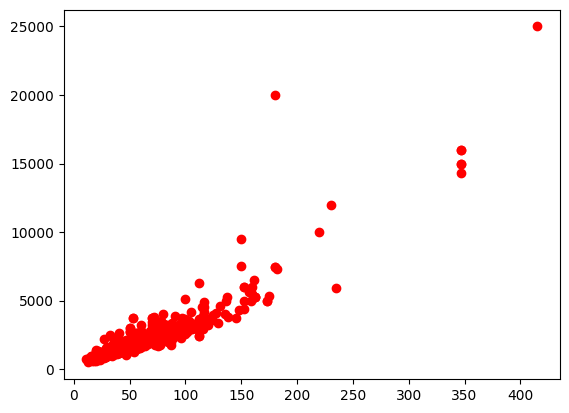

In [ ]:
plt.scatter(data['position'],data['salary'],c='r')


In [ ]:
#exclure le loyer > 10000
data= data[data['loyer']<=10000]
data.shape

(537, 2)

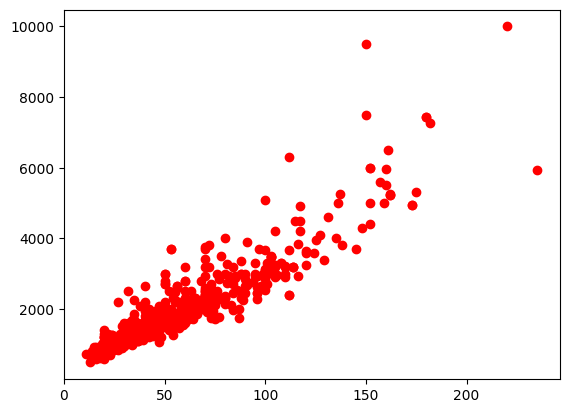

In [ ]:
plt.scatter(data['surface'],data['loyer'],c='r')

In [ ]:
X=data.iloc[:,1:].values
X

NameError: ignored

In [ ]:
Y=data.iloc[:,0].values
Y

#train_test_split()


In [ ]:
#from os import X_OK
#diviser le dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1.0/3)
print(len(X))
print(len(X_train)) 
print(len(X_test))

537
358
179


In [ ]:
#construire le model
regression=LinearRegression()
# apprendre le model
regression.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#faire des prediction
Y_predect= regression.predict(X_test)
print(Y_predect[0:10])
print(Y_test[0:10])

[2601.89138188  836.16053733 1028.78572037 1927.70324123 1317.72349493
 3243.97532535  900.36893167 1189.30670624 2120.32842427 2601.89138188]
[2162  733  980 1620 1580 3000  840 1048 1900 1705]


In [ ]:
#predect 200
x=[[200]]
y=regression.predict(x)
print(y)

[6589.46909928]


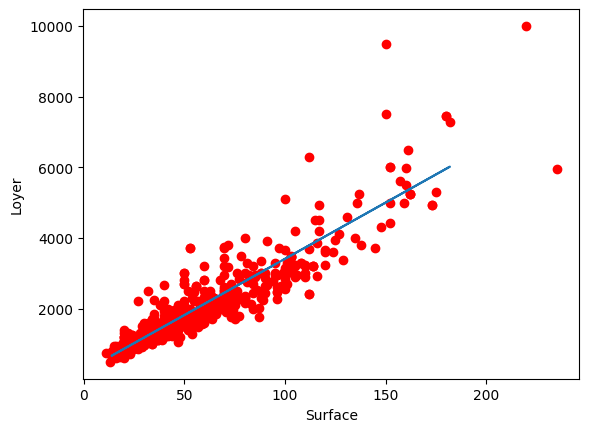

In [ ]:
plt.scatter(data['surface'],data['loyer'],c='r')
surface,loyer=X_train,regression.predict(X_train)
plt.plot(surface, loyer)
plt.xlabel('Surface')
plt.ylabel('Loyer')
plt.show()

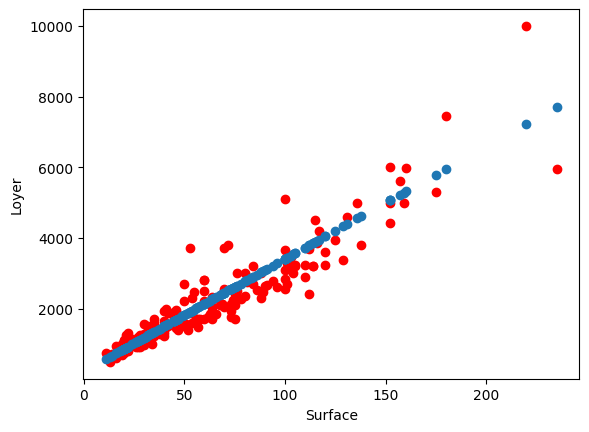

In [ ]:
plt.scatter(X_test,Y_test,c='r')
surface,loyer=X_test,regression.predict(X_test)
plt.scatter(surface, loyer)
plt.xlabel('Surface')
plt.ylabel('Loyer')
plt.show()

In [ ]:
Y_predect=regression.predict(X_train)
np.sqrt(((Y_train-Y_predect)**2).mean())

511.9403129261458

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Charger les données
data = pd.read_csv('data.csv')


In [ ]:
# Séparer les variables catégorielles et numériques
cat_cols = ['gender', 'city']
num_cols = ['age']

# Créer un ColumnTransformer pour appliquer OneHotEncoder aux variables catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_cols)
    ],remainder='passthrough')


In [ ]:
# Appliquer le ColumnTransformer pour transformer les variables catégorielles en variables binaires
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]


In [ ]:
X_encoded = preprocessor.fit_transform(X)
print(X)
print(X_encoded)

   gender      city  age
0    Male     Paris   30
1  Female  New York   25
2    Male    London   35
3  Female     Tokyo   28
[[ 0.  1.  0.  0.  1.  0. 30.]
 [ 1.  0.  0.  1.  0.  0. 25.]
 [ 0.  1.  1.  0.  0.  0. 35.]
 [ 1.  0.  0.  0.  0.  1. 28.]]


In [ ]:
# Diviser les données en ensembles de formation et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.25)
#data.drop('income', axis=1)
X_train
X_test

array([[ 0.,  1.,  0.,  0.,  1.,  0., 30.]])

In [ ]:
# Appliquer la régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
#y_pred = model.predict(X_train_encoded)
# Calculer l'erreur de prédiction
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 16131416.28594466


In [ ]:
y_pred

array([54016.39344262])

In [ ]:
y_test.values

array([50000])